# Exercise 3.3: Logistic Regression vs. LDA 

In this part, you will explore the choice between Logistic Regression and Linear Discrimnant Analysis for a given dataset. In addition, you will learn how to visualize the probabilistic output of Logistic Regression.

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

## Optimization function of Logistic Regression

In your lecture slides, the following cost function for Logistic Regression has been introduced and needs to get minimized to determine the optimal choice of the parameters $\mathbf{w}$:

\begin{equation}
J_{1}(w) = \sum_{i=1}^{N_{samples}} \ln(\exp(-\mathbf{y_{i}}(\mathbf{w}^{\rm T}\mathbf{x_{i}}))+1)
\end{equation}

### Q3.3.1 Assuming linear separability of a given data set, what can happen to the weights $\mathbf w$ when minimizing the cost function $J_{1}(\mathbf{w})$? Why is this a problem?

__Hint:__  Assume it exists a weight vector $\mathbf{\tilde w}$ such that $\mathbf{y_{i}}(\mathbf{\tilde w}^{\rm T}\mathbf{x_{i}}) > 0$ for all sample points $i$. The class labels are defined as $y_{i}=\{-1,1\}$.

__Answer__: Given the vector $\mathbf{w_{c}} = c\cdot \mathbf{w}$, look at $\lim\limits_{c \to \infty} J_{1}(\mathbf{w}_{c})$ with $c$ being a scalar. The given cost function $J_{1}(w)$ gets minimal for large values of $c$ which can cause numerical instabilities in terms of weight vectors $\mathbf w$. Thus, we need to exclude those extreme values for $\mathbf{w}$ from the solution space.

---------------------------------------------------

A more stable estimate for $\mathbf{w}$ can be achieved when using the concept of __Regularization__. Adding an additional term $J_{2}(\mathbf{w}) = \frac{1}{2}\mathbf{w}^{\rm T}\mathbf{w}$ to the cost function modifies the overall cost function $J(\mathbf{w},C)$ to: 

\begin{equation}
J(w,C) = J_{1}(\mathbf{w},C) + J_{2}(\mathbf{w}) = C\cdot \sum_{i=1}^{N_{samples}} \ln(\exp(-\mathbf{y}(\mathbf{w}^{\rm T}\mathbf{X}))+1) + \frac{1}{2}\mathbf{w}^{\rm T}\mathbf{w}
\end{equation}

Note, that the so-called regularization parameter $C$ determines the relation of the second cost function $J_{2}(w)$ with respect to the first cost function $J_{1}(w)$.

### Q3.3.2 Which role has the additional cost function $J_{2}(w)$?

__Answer__: This cost function is equal to the squared sum of all $D_{features}$ weights. This means that solutions with large values of $\mathbf{w}$ get penalized while solution with small values in $\mathbf{w}$ are supported. Thus, the function $J_{2}(\mathbf{w})$ is often referred to as penalty function and can be defined with different norms (here: L2-norm).


## Evaluate and visualize the output of a Logistic Regression model

__Tasks:__ 
1. Visualize the given data set using the class labels. 
2. Lookup the scikit-learn toolbox implementation of a Logistic Regression model. Then train a model on the given training data. Please make sure that you use an "L2-penalty" for regularization and set your regularization parameter to C = 1.
3. Use your trained Logistic Regression model to predict the class labels of the test data and report on the classification performance.
4. Inspect the given function "plot_probabilityMap" and use it to visualize the probability map of class "1" of your trained Logistic Regression model using the test data set as an input.

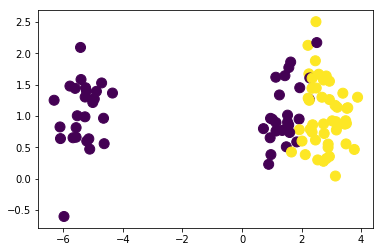

In [2]:
ds_trainData = 'data/spread_train.data'
ds_trainLabels ='data/spread_train.labels'
ds_testData = 'data/spread_test.data'
ds_testLabels ='data/spread_test.labels'

# load training data
X_train = np.loadtxt(ds_trainData)
y_train = np.loadtxt(ds_trainLabels)

# load test data
X_test = np.loadtxt(ds_testData)
y_test = np.loadtxt(ds_testLabels)

# (1.)-> Scatter-plot of your 2D-training data using the class labels of the training data
plt.figure()
plt.scatter(X_train[:, 0], X_train[:, 1], marker='o', c=y_train, s=100)
# plt.gray()  # Note Jan: if gray is chosen, only one class is visible (other is white)
plt.show()


In [3]:
# (2.) Train a logistic regression model
logReg = LogisticRegression(C=1, penalty='l2')
logReg.fit(X_train, y_train)

# (3.) Predict the class labels on the test data and return a classfication rate (0-1-Loss)
y_pred = logReg.predict(X_test)
classif_rate = logReg.score(X_test,y_test)

print("Classification rate of Logistic Regression model: %3.2f%% " % (classif_rate*100))

Classification rate of Logistic Regression model: 89.00% 


/home/mlss19/.anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [4]:
def plot_probabilityMap(model, X, y, y_pred, plot_means, class_index):
    '''visualizes the output of the applied models with a
    probability map
    INPUT: 
    'model'-> scikit-learn like instance of classifier models with built-in method 'predict_proba' available
    'X' -> data matrix of size NxD
    'y' -> true class labels
    'y_pred' -> predicted class labels
    'plot_means' -> only for LDA: adding class means to the plot
    'class_index' -> probability map for class, either '0' or '1'
    
    OUTPUT:
    splot: figure handle of the plot
    '''
    splot = plt.figure()
    
    tp = (y == y_pred)  # True Positive
    tp0, tp1 = tp[y == 0], tp[y == 1]
    X0, X1 = X[y == 0], X[y == 1]
    X0_tp, X0_fp = X0[tp0], X0[~tp0]
    X1_tp, X1_fp = X1[tp1], X1[~tp1]

    # class 0: true positives vs. false positives
    plt.plot(X0_tp[:, 0], X0_tp[:, 1], 'o', color='red')
    plt.plot(X0_fp[:, 0], X0_fp[:, 1], 'o', color='salmon')  # dark red

    # class 1:
    plt.plot(X1_tp[:, 0], X1_tp[:, 1], 'o', color='blue')
    plt.plot(X1_fp[:, 0], X1_fp[:, 1], 'o', color='lightskyblue')  # dark blue

    # class 0 and 1 : areas
    nx, ny = 200, 100
    x_min, x_max = plt.xlim()
    y_min, y_max = plt.ylim()
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, nx),
                         np.linspace(y_min, y_max, ny))
    Z = model.predict_proba(np.c_[xx.ravel(), yy.ravel()])
    Z = Z[:, class_index].reshape(xx.shape)
    plt.pcolormesh(xx, yy, Z, cmap='YlOrBr')
    # colorbar assigning the probabilities
    plt.colorbar()
        
    # plot the contour of the 50 probability
    plt.contour(xx, yy, Z, [0.5], linewidths=2., colors='k')

    # plot class means (only makes sense for LDA)
    if plot_means: 
        plt.plot(model.means_[0][0], model.means_[0][1],
                 'o', color='black', markersize=10)
        plt.plot(model.means_[1][0], model.means_[1][1],
                 'o', color='black', markersize=10)

    return splot

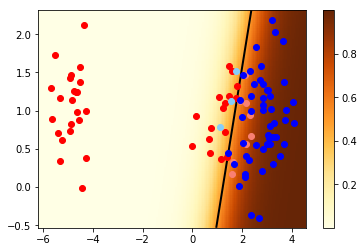

In [5]:
# (4.): Visualize the Logistic Regression Output
# Hint: set the flag "plot_means" to False as the Logistic Regression Model does not depend on the class means
splot = plot_probabilityMap(logReg,X_test,y_test,y_pred,plot_means=False,class_index = 1)

## Comparison with performance of the LDA 

For comparison, you now need to train and evaluate an LDA model on the same data set and evaluate its performance.

__Tasks:__
1. Lookup the scikit-learn toolbox implementation for an LDA model. Then train a model on the given training data. Please specify your solver to "eigen".
2. Use your trained LDA model to predict the class labels of the test data and report on the classification performance.
3. Apply the given function "plot_probabilityMap" to visualize the probability map of class "1" of your trained LDA model taking the test data set as an input. Use the input parameter of the function to visualize the class means.

In [6]:
# (1) Train an LDS model
lda = LinearDiscriminantAnalysis(solver="eigen")
lda.fit(X_train, y_train)

# (2) Predict the class labels on the test data and return a classfication rate (0-1-Loss)
y_pred_lda = lda.predict(X_test)
classif_rate = lda.score(X_test,y_test)

print("Classification rate of LDA model: %3.2f%% " % (classif_rate*100))

Classification rate of LDA model: 78.00% 


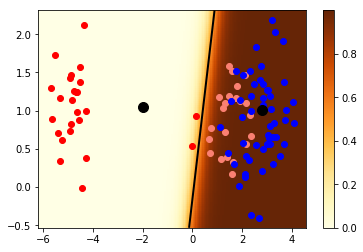

In [7]:
# (3): Visualize the LDA output

splot=plot_probabilityMap(lda,X_test,y_test,y_pred_lda,plot_means=True,class_index = 1)

### Q3.3.3) Compare the performance of the Logistic Regression model with the LDA for the given dataset. Do you observe a severe difference in the performance of both models? Can you explain the reason?
__Hint__: You can compare the two decision boundaries.

__Answer:__ Logistic Regression outperforms the LDA. For the LDA the assumption about equal class-wise covariance matrices is strongly violated.

### Q3.3.4) How can you estimate a probability from an LDA classifier? Remember that this is not a probabilistic method by default.

__Answer:__ One possibility is to apply a sigmoid function s(x) = 1 / (1 + exp(-x)) to the output of the LDA classifier. This rescaling converts the distance to the hyperplane into a number between (0,1) which can be understood as a probability. The probability of one data point $\mathbf x_i$ belonging to class $C_1$ is then given by:

\begin{equation}
p(C_{1}|\mathbf x_i) = \frac{1}{1+exp(-\mathbf w^{\rm T} \mathbf x_i + b)}
\end{equation}